

Нам дана формула:
$
\frac{1}{|x| + 4} + \frac{3}{y^2 + 4}
$
, определенная на участке:

 D = {(x, y) : x ∈ [−20, 20], y ∈ [−20, 20]}


**Цели работы:**

**1)** Необходимо реализовать нейронную сеть.
функции активации:
Sigmoid, гиперболический тангенс, ReLu, PReLU

**2)** Реализовать 3 вида оптимизатора  
(SGD, AdaGrad, Adam) (оптимизаторы реализовать все)

**3)** Добавить второй слой (Sigmoid, ReLU,SGD)

### Оптимизаторы


1. **SGD** (Stochastic Gradient Descent) — стохастический градиентный спуск
SGD — это простой и базовый метод оптимизации. Он работает, обновляя параметры модели на каждом шаге в направлении отрицательного градиента функции ошибки.

Формула обновления весов:
w=w−η⋅grad_w
где w — веса, η — скорость обучения, а grad_w — градиент ошибки по весам.

**Преимущества**: простота, интуитивность.

**Недостатки**: фиксированная скорость обучения может приводить к нестабильности, медленному сходу и затрудняет обучение на сложных функциях.

2. **AdaGrad** — адаптивный градиентный спуск
AdaGrad адаптирует скорость обучения для каждого параметра на основе суммы квадратов его градиентов, накопленных на каждом шаге. Это позволяет автоматом замедлять обучение для параметров с большой историей градиента и ускорять для остальных.

Формула обновления весов:
w= w − η/sqr(G + ϵ) ⋅ grad_w
где G — накопленная сумма квадратов градиентов для каждого веса, а ϵ — маленькая константа для стабилизации деления.

Преимущества: помогает эффективно справляться с редкими признаками и сложными функциями.
Недостатки: может привести к слишком сильному снижению скорости обучения.

**Adam** (Adaptive Moment Estimation) — адаптивная оценка моментов
Adam комбинирует идеи из метода накопления среднего градиента (Momentum) и метода AdaGrad. Он поддерживает отдельные моменты для каждого параметра — средний градиент и накопленный квадрат градиента.

Формула обновления весов:
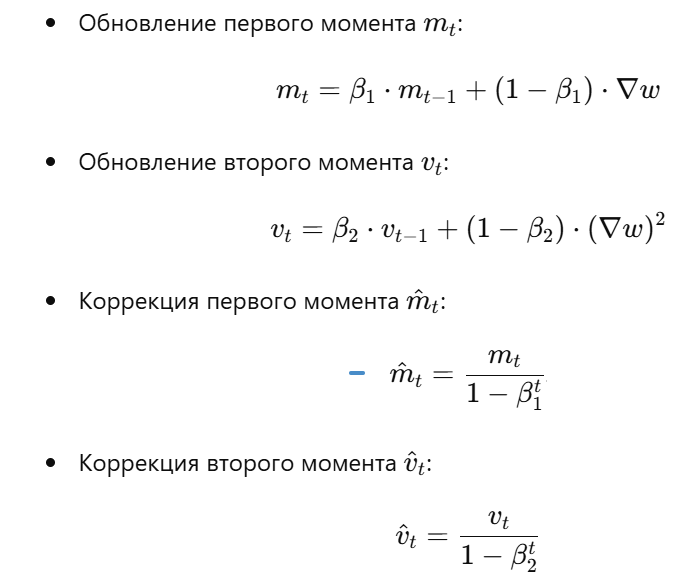
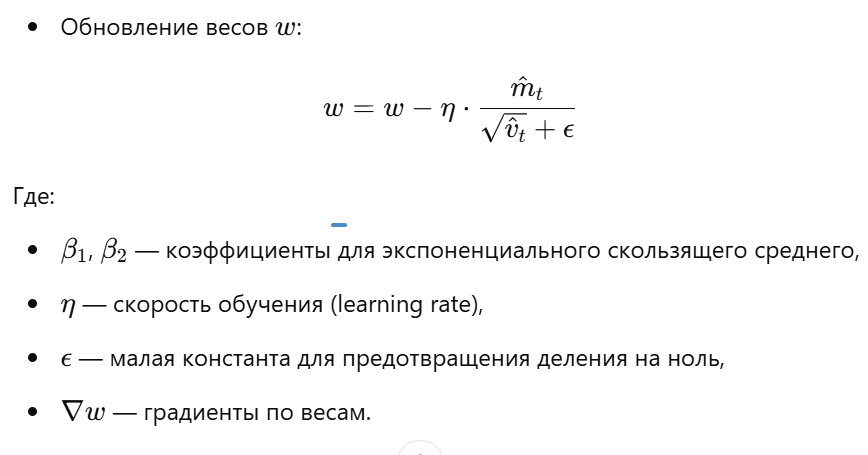

relu:
ReLU
(
𝑥
)
=
max
⁡
(
0
,
𝑥
)
ReLU(x)=max(0,x)
prelu: параметрическая ReLU, где
𝛼
𝑥
αx, если
𝑥
<
0
x<0.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class NeuralNetwork:
    def __init__(self, activation='sigmoid', learning_rate=0.0001, epochs=1000, hidden_neurons=50, alpha=0.1):
        self.activation = activation
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.hidden_neurons = hidden_neurons
        self.alpha = alpha

        # Инициализация весов
        self.weights_input_hidden = np.random.uniform(-0.1, 0.1, (2, self.hidden_neurons))
        self.bias_hidden = np.random.uniform(-0.1, 0.1, self.hidden_neurons)
        self.weights_hidden_output = np.random.uniform(-0.1, 0.1, (self.hidden_neurons, 1))
        self.bias_output = np.random.uniform(-0.1, 0.1, 1)

    def activate(self, x):
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-x))
        elif self.activation == 'tanh':
            return np.tanh(x)
        elif self.activation == 'relu':
            return np.maximum(0, x)
        elif self.activation == 'prelu':
            return np.where(x > 0, x, self.alpha * x)

    def activate_derivative(self, x):
        if self.activation == 'sigmoid':
            sig = self.activate(x)
            return sig * (1 - sig)
        elif self.activation == 'tanh':
            return 1 - np.tanh(x)**2
        elif self.activation == 'relu':
            return np.where(x > 0, 1, 0)
        elif self.activation == 'prelu':
            return np.where(x > 0, 1, self.alpha)

    def feedforward(self, x):
        hidden_input = np.dot(x, self.weights_input_hidden) + self.bias_hidden
        hidden_output = self.activate(hidden_input)
        output_layer_input = np.dot(hidden_output, self.weights_hidden_output) + self.bias_output
        return output_layer_input, hidden_output, hidden_input

    def train(self, X, y):
        loss_history = []
        for epoch in range(self.epochs):
            epoch_loss = 0
            for i in range(len(X)):
                # Прямой проход
                input_vector = X[i]
                target = y[i]
                output, hidden_output, hidden_input = self.feedforward(input_vector)

                # Вычисление ошибки
                error = target - output
                epoch_loss += np.sum(error**2)  # Ошибка добавляется как сумма квадратов

                # Обратное распространение
                grad_output = error  # Градиент выходного слоя
                grad_hidden = np.dot(grad_output, self.weights_hidden_output.T) * self.activate_derivative(hidden_input)

                # Обновление весов
                self.weights_hidden_output += self.learning_rate * np.outer(hidden_output, grad_output)
                self.bias_output += self.learning_rate * grad_output
                self.weights_input_hidden += self.learning_rate * np.outer(input_vector, grad_hidden)
                self.bias_hidden += self.learning_rate * grad_hidden

            # Средний MSE за эпоху
            epoch_loss /= len(X)  # Скалярное значение
            loss_history.append(epoch_loss)
            if (epoch + 1) % 100 == 0:
                print(f"Эпоха {epoch + 1}, MSE: {epoch_loss:.6f}")

        return loss_history


    def predict(self, X):
        predictions = []
        for x in X:
            output, _, _ = self.feedforward(x)
            predictions.append(output)
        return np.array(predictions)

    def plot_results(self, X, Y, Z, Z_pred, title):
        fig = plt.figure(figsize=(12, 6))
        ax1 = fig.add_subplot(121, projection='3d')
        ax1.plot_surface(X, Y, Z, cmap='viridis')
        ax1.set_title("Истинная функция")
        ax2 = fig.add_subplot(122, projection='3d')
        ax2.plot_surface(X, Y, Z_pred.reshape(X.shape), cmap='viridis')
        ax2.set_title(title)
        plt.show()


Тренируем с активацией: sigmoid
Эпоха 100, MSE: 0.000178
Эпоха 200, MSE: 0.000075
Эпоха 300, MSE: 0.000037
Эпоха 400, MSE: 0.000019
Эпоха 500, MSE: 0.000017
Эпоха 600, MSE: 0.000017
Эпоха 700, MSE: 0.000015
Эпоха 800, MSE: 0.000015
Эпоха 900, MSE: 0.000016
Эпоха 1000, MSE: 0.000016


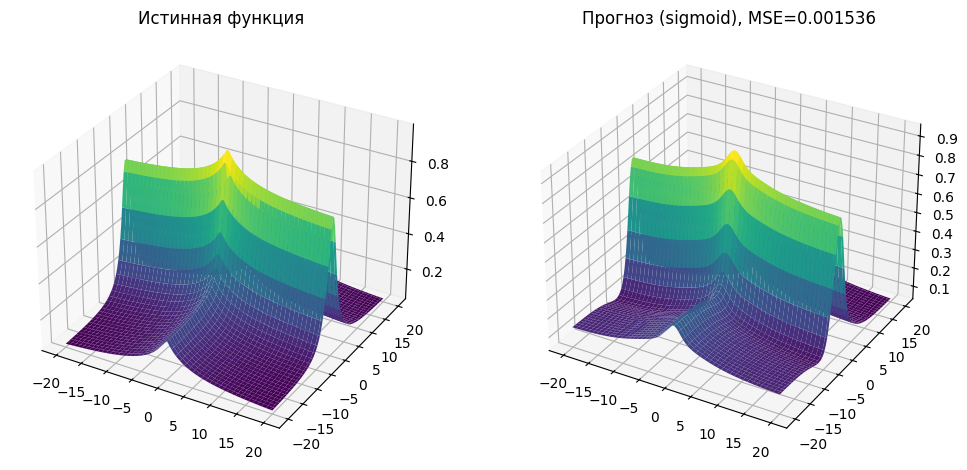

Функция активации: sigmoid, Финальный MSE: 0.001536
Тренируем с активацией: tanh
Эпоха 100, MSE: 0.000044
Эпоха 200, MSE: 0.000033
Эпоха 300, MSE: 0.000009
Эпоха 400, MSE: 0.000009
Эпоха 500, MSE: 0.000008
Эпоха 600, MSE: 0.000007
Эпоха 700, MSE: 0.000006
Эпоха 800, MSE: 0.000006
Эпоха 900, MSE: 0.000005
Эпоха 1000, MSE: 0.000005


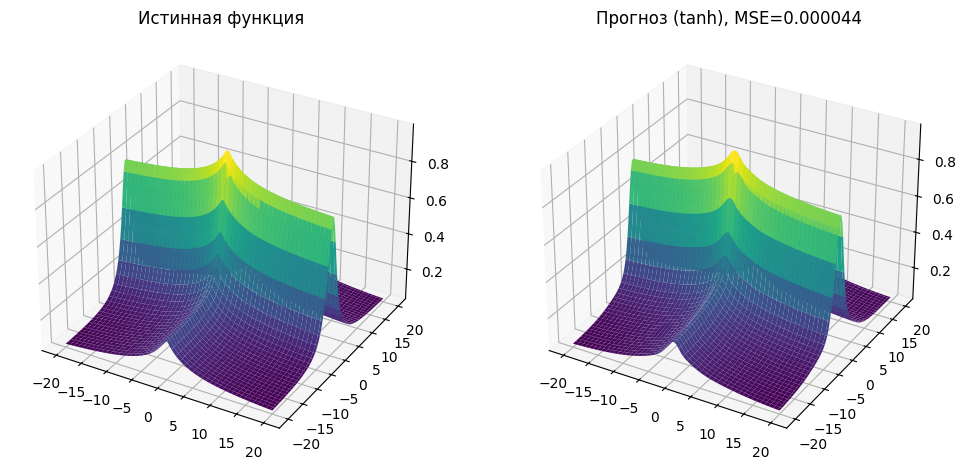

Функция активации: tanh, Финальный MSE: 0.000044
Тренируем с активацией: relu
Эпоха 100, MSE: 0.001198
Эпоха 200, MSE: 0.001584
Эпоха 300, MSE: 0.001311
Эпоха 400, MSE: 0.001089
Эпоха 500, MSE: 0.001378
Эпоха 600, MSE: 0.001485
Эпоха 700, MSE: 0.001338
Эпоха 800, MSE: 0.001291
Эпоха 900, MSE: 0.001110
Эпоха 1000, MSE: 0.001145


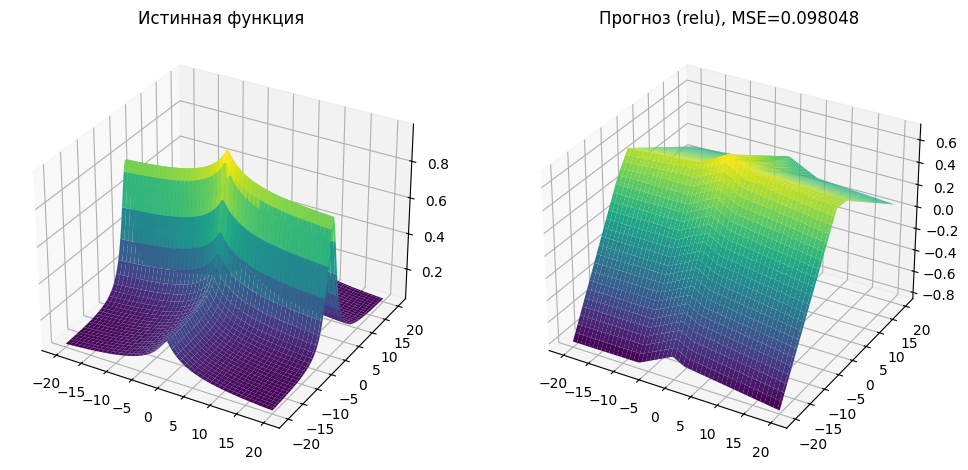

Функция активации: relu, Финальный MSE: 0.098048
Тренируем с активацией: prelu
Эпоха 100, MSE: 0.001173
Эпоха 200, MSE: 0.001106
Эпоха 300, MSE: 0.001118
Эпоха 400, MSE: 0.001439
Эпоха 500, MSE: 0.001507
Эпоха 600, MSE: 0.001492
Эпоха 700, MSE: 0.001496
Эпоха 800, MSE: 0.001492
Эпоха 900, MSE: 0.001491
Эпоха 1000, MSE: 0.001486


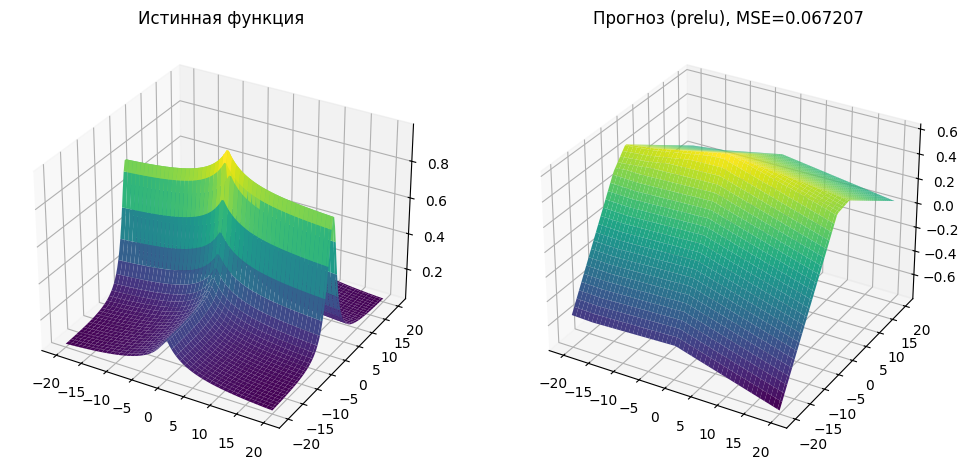

Функция активации: prelu, Финальный MSE: 0.067207


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def train_and_visualize_all_activations(nn_class, x_range, y_range, num_points, epochs, learning_rate, hidden_neurons):
    """
    Функция для тренировки и визуализации результатов нейронной сети для всех функций активации.
    """
    # Генерация данных
    x = np.linspace(*x_range, num_points)
    y = np.linspace(*y_range, num_points)
    X, Y = np.meshgrid(x, y)
    Z = 1 / (np.abs(X) + 4) + 3 / (Y**2 + 4)  # Целевая функция

    # Преобразование данных для обучения
    inputs = np.c_[X.ravel(), Y.ravel()]
    outputs = Z.ravel()

    # Перебор функций активации
    for activation in ['sigmoid', 'tanh']:
        print(f"Тренируем с активацией: {activation}")

        # Инициализация сети
        nn = nn_class(
            activation=activation,
            learning_rate=learning_rate,
            epochs=epochs,
            hidden_neurons=hidden_neurons,
        )

        # Обучение
        loss_history = nn.train(inputs, outputs)

        # Предсказание
        Z_pred = nn.predict(inputs)

        # Вычисление ошибки
        mse = np.mean((Z - Z_pred.reshape(X.shape)) ** 2)

        # Визуализация
        nn.plot_results(X, Y, Z, Z_pred.reshape(X.shape), f"Прогноз ({activation}), MSE={mse:.6f}")

        print(f"Функция активации: {activation}, Финальный MSE: {mse:.6f}")



train_and_visualize_all_activations(
    nn_class=NeuralNetwork,
    x_range=(-20, 20),
    y_range=(-20, 20),
    num_points=100,
    epochs=1000,
    learning_rate=0.01,
    hidden_neurons=20,  # Количество нейронов в скрытом слое
)


Тренируем с активацией: relu
Эпоха 100, MSE: 0.005544
Эпоха 200, MSE: 0.004186
Эпоха 300, MSE: 0.003266
Эпоха 400, MSE: 0.002237
Эпоха 500, MSE: 0.001466
Эпоха 600, MSE: 0.000893
Эпоха 700, MSE: 0.000589
Эпоха 800, MSE: 0.000442
Эпоха 900, MSE: 0.000369
Эпоха 1000, MSE: 0.000320


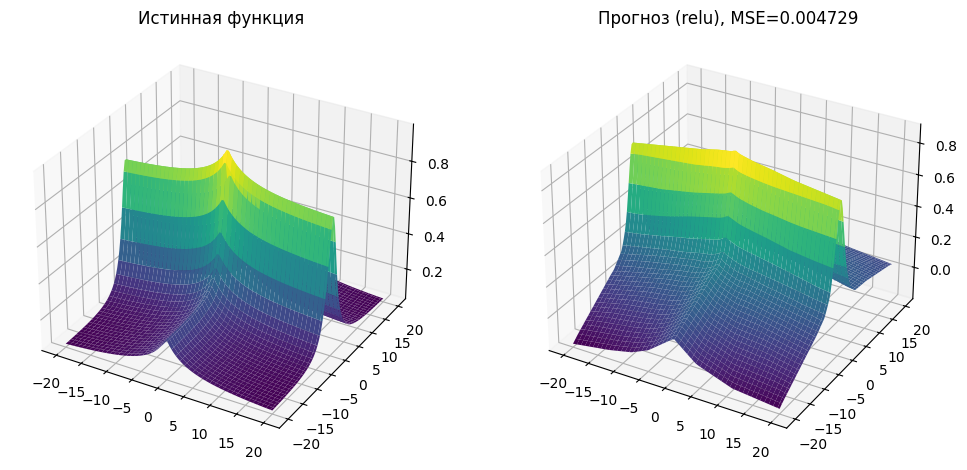

Функция активации: relu, Финальный MSE: 0.004729
Тренируем с активацией: prelu
Эпоха 100, MSE: 0.006010
Эпоха 200, MSE: 0.004377
Эпоха 300, MSE: 0.003574
Эпоха 400, MSE: 0.002984
Эпоха 500, MSE: 0.002426
Эпоха 600, MSE: 0.001842
Эпоха 700, MSE: 0.001429
Эпоха 800, MSE: 0.001098
Эпоха 900, MSE: 0.000829
Эпоха 1000, MSE: 0.000622


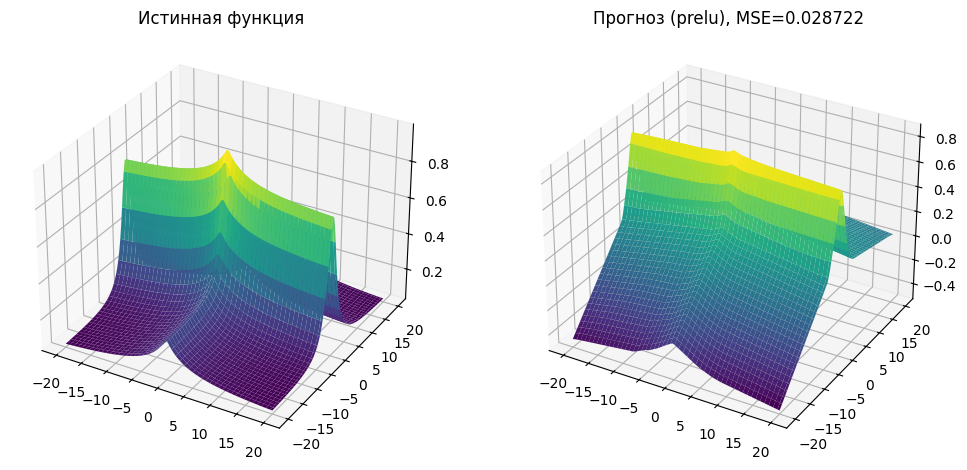

Функция активации: prelu, Финальный MSE: 0.028722


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def train_and_visualize_all_activations(nn_class, x_range, y_range, num_points, epochs, learning_rate, hidden_neurons):
    """
    Функция для тренировки и визуализации результатов нейронной сети для всех функций активации.
    """
    # Генерация данных
    x = np.linspace(*x_range, num_points)
    y = np.linspace(*y_range, num_points)
    X, Y = np.meshgrid(x, y)
    Z = 1 / (np.abs(X) + 4) + 3 / (Y**2 + 4)  # Целевая функция

    # Преобразование данных для обучения
    inputs = np.c_[X.ravel(), Y.ravel()]
    outputs = Z.ravel()

    # Перебор функций активации
    for activation in ['relu', 'prelu']:
        print(f"Тренируем с активацией: {activation}")

        # Инициализация сети
        nn = nn_class(
            activation=activation,
            learning_rate=learning_rate,
            epochs=epochs,
            hidden_neurons=hidden_neurons,
        )

        # Обучение
        loss_history = nn.train(inputs, outputs)

        # Предсказание
        Z_pred = nn.predict(inputs)

        # Вычисление ошибки
        mse = np.mean((Z - Z_pred.reshape(X.shape)) ** 2)

        # Визуализация
        nn.plot_results(X, Y, Z, Z_pred.reshape(X.shape), f"Прогноз ({activation}), MSE={mse:.6f}")

        print(f"Функция активации: {activation}, Финальный MSE: {mse:.6f}")



train_and_visualize_all_activations(
    nn_class=NeuralNetwork,
    x_range=(-20, 20),
    y_range=(-20, 20),
    num_points=100,
    epochs=1000,
    learning_rate=0.0001,
    hidden_neurons=50,  # Количество нейронов в скрытом слое
)


Тренируем с активацией: prelu
Эпоха 100, MSE: 0.001429
Эпоха 200, MSE: 0.000407
Эпоха 300, MSE: 0.000412
Эпоха 400, MSE: 0.000465
Эпоха 500, MSE: 0.000468
Эпоха 600, MSE: 0.000426
Эпоха 700, MSE: 0.000698
Эпоха 800, MSE: 0.000414
Эпоха 900, MSE: 0.000405
Эпоха 1000, MSE: 0.000380
Эпоха 1100, MSE: 0.000416
Эпоха 1200, MSE: 0.000347
Эпоха 1300, MSE: 0.000426
Эпоха 1400, MSE: 0.000588
Эпоха 1500, MSE: 0.000970
Эпоха 1600, MSE: 0.000386
Эпоха 1700, MSE: 0.000452
Эпоха 1800, MSE: 0.000974
Эпоха 1900, MSE: 0.000457
Эпоха 2000, MSE: 0.000312
Эпоха 2100, MSE: 0.000489
Эпоха 2200, MSE: 0.000367
Эпоха 2300, MSE: 0.000322
Эпоха 2400, MSE: 0.000393
Эпоха 2500, MSE: 0.000401
Эпоха 2600, MSE: 0.001030
Эпоха 2700, MSE: 0.000848
Эпоха 2800, MSE: 0.000458
Эпоха 2900, MSE: 0.000405
Эпоха 3000, MSE: 0.000520
Эпоха 3100, MSE: 0.000490
Эпоха 3200, MSE: 0.000333
Эпоха 3300, MSE: 0.000369
Эпоха 3400, MSE: 0.000636
Эпоха 3500, MSE: 0.000357
Эпоха 3600, MSE: 0.000737
Эпоха 3700, MSE: 0.000468
Эпоха 3800, MSE: 

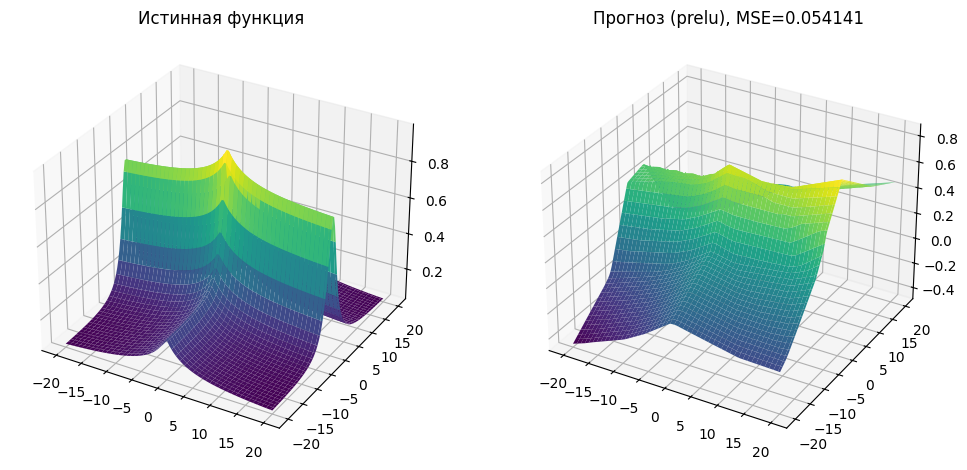

Функция активации: prelu, Финальный MSE: 0.054141


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt


# def train_and_visualize_all_activations(nn_class, x_range, y_range, num_points, epochs, learning_rate, hidden_neurons):
#     """
#     Функция для тренировки и визуализации результатов нейронной сети для всех функций активации.
#     """
#     # Генерация данных
#     x = np.linspace(*x_range, num_points)
#     y = np.linspace(*y_range, num_points)
#     X, Y = np.meshgrid(x, y)
#     Z = 1 / (np.abs(X) + 4) + 3 / (Y**2 + 4)  # Целевая функция

#     # Преобразование данных для обучения
#     inputs = np.c_[X.ravel(), Y.ravel()]
#     outputs = Z.ravel()

#     # Перебор функций активации
#     for activation in [ 'prelu']:
#         print(f"Тренируем с активацией: {activation}")

#         # Инициализация сети
#         nn = nn_class(
#             activation=activation,
#             learning_rate=learning_rate,
#             epochs=epochs,
#             hidden_neurons=hidden_neurons,
#         )

#         # Обучение
#         loss_history = nn.train(inputs, outputs)

#         # Предсказание
#         Z_pred = nn.predict(inputs)

#         # Вычисление ошибки
#         mse = np.mean((Z - Z_pred.reshape(X.shape)) ** 2)

#         # Визуализация
#         nn.plot_results(X, Y, Z, Z_pred.reshape(X.shape), f"Прогноз ({activation}), MSE={mse:.6f}")

#         print(f"Функция активации: {activation}, Финальный MSE: {mse:.6f}")



# train_and_visualize_all_activations(
#     nn_class=NeuralNetwork,
#     x_range=(-20, 20),
#     y_range=(-20, 20),
#     num_points=100,
#     epochs=5000,
#     learning_rate=0.01,
#     hidden_neurons=60,  # Количество нейронов в скрытом слое
# )


## Задание 2 оптимизаторы

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


class NeuralNetwork:
    def __init__(self, activation='sigmoid', learning_rate=0.005, epochs=1000, hidden_neurons=10, alpha=0.1, optimizer='SGD'):
        self.activation = activation
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.hidden_neurons = hidden_neurons
        self.alpha = alpha
        self.optimizer = optimizer

        # Инициализация весов
        self.weights_input_hidden = np.random.uniform(-0.1, 0.1, (2, self.hidden_neurons))
        self.bias_hidden = np.random.uniform(-0.1, 0.1, self.hidden_neurons)
        self.weights_hidden_output = np.random.uniform(-0.1, 0.1, (self.hidden_neurons, 1))
        self.bias_output = np.random.uniform(-0.1, 0.1, 1)

        # Для оптимизаторов
        self.momentum = 0.9  # Для SGD с моментумом
        self.epsilon = 1e-8  # Для AdaGrad и Adam
        self.beta1 = 0.9  # Для Adam
        self.beta2 = 0.999  # Для Adam

        # Состояние для AdaGrad и Adam
        self.cache = {
            "weights_input_hidden": np.zeros_like(self.weights_input_hidden),
            "bias_hidden": np.zeros_like(self.bias_hidden),
            "weights_hidden_output": np.zeros_like(self.weights_hidden_output),
            "bias_output": np.zeros_like(self.bias_output)
        }
        self.m = self.cache.copy()  # Для Adam
        self.v = self.cache.copy()  # Для Adam

    def activate(self, x):
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-x))
        elif self.activation == 'tanh':
            return np.tanh(x)
        elif self.activation == 'relu':
            return np.maximum(0, x)
        elif self.activation == 'prelu':
            return np.where(x > 0, x, self.alpha * x)

    def activate_derivative(self, x):
        if self.activation == 'sigmoid':
            sig = self.activate(x)
            return sig * (1 - sig)
        elif self.activation == 'tanh':
            return 1 - np.tanh(x)**2
        elif self.activation == 'relu':
            return np.where(x > 0, 1, 0)
        elif self.activation == 'prelu':
            return np.where(x > 0, 1, self.alpha)

    def feedforward(self, x):
        hidden_input = np.dot(x, self.weights_input_hidden) + self.bias_hidden
        hidden_output = self.activate(hidden_input)
        output_layer_input = np.dot(hidden_output, self.weights_hidden_output) + self.bias_output
        return output_layer_input, hidden_output, hidden_input

    def update_weights(self, gradients, t):
        """
        Обновление весов в зависимости от выбранного оптимизатора.
        """
        for param, grad in gradients.items():
            if self.optimizer == 'SGD':
                self.cache[param] = self.momentum * self.cache[param] + (1 - self.momentum) * grad
                updated_value = getattr(self, param) + self.learning_rate * self.cache[param]
                setattr(self, param, updated_value)

            elif self.optimizer == 'AdaGrad':
                self.cache[param] += grad ** 2
                updated_value = getattr(self, param) + self.learning_rate * grad / (np.sqrt(self.cache[param]) + self.epsilon)
                setattr(self, param, updated_value)

            elif self.optimizer == 'Adam':
                self.m[param] = self.beta1 * self.m[param] + (1 - self.beta1) * grad
                self.v[param] = self.beta2 * self.v[param] + (1 - self.beta2) * (grad ** 2)

                m_hat = self.m[param] / (1 - self.beta1 ** t)
                v_hat = self.v[param] / (1 - self.beta2 ** t)

                updated_value = getattr(self, param) + self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)
                setattr(self, param, updated_value)


    def train(self, X, y):
        loss_history = []
        for epoch in range(1, self.epochs + 1):
            epoch_loss = 0
            for i in range(len(X)):
                # Прямой проход
                input_vector = X[i]
                target = y[i]
                output, hidden_output, hidden_input = self.feedforward(input_vector)

                # Вычисление ошибки
                error = target - output
                epoch_loss += np.sum(error**2)  # Ошибка добавляется как сумма квадратов

                # Обратное распространение
                grad_output = error  # Градиент выходного слоя
                grad_hidden = np.dot(grad_output, self.weights_hidden_output.T) * self.activate_derivative(hidden_input)

                # Вычисление градиентов
                gradients = {
                    "weights_hidden_output": np.outer(hidden_output, grad_output),
                    "bias_output": grad_output,
                    "weights_input_hidden": np.outer(input_vector, grad_hidden),
                    "bias_hidden": grad_hidden
                }

                # Обновление весов
                self.update_weights(gradients, t=epoch)

            # Средний MSE за эпоху
            epoch_loss /= len(X)  # Скалярное значение
            loss_history.append(epoch_loss)
            if epoch % 100 == 0:
                print(f"Эпоха {epoch}, MSE: {epoch_loss:.6f}")

        return loss_history

    def predict(self, X):
        predictions = []
        for x in X:
            output, _, _ = self.feedforward(x)
            predictions.append(output)
        return np.array(predictions)

    def plot_results(self, X, Y, Z, Z_pred, title):
        fig = plt.figure(figsize=(12, 6))
        ax1 = fig.add_subplot(121, projection='3d')
        ax1.plot_surface(X, Y, Z, cmap='viridis')
        ax1.set_title("Истинная функция")
        ax2 = fig.add_subplot(122, projection='3d')
        ax2.plot_surface(X, Y, Z_pred.reshape(X.shape), cmap='viridis')
        ax2.set_title(title)
        plt.show()




=== Оптимизатор: SGD ===
Эпоха 100, MSE: 0.011423
Эпоха 200, MSE: 0.009800
Эпоха 300, MSE: 0.008956
Эпоха 400, MSE: 0.008466
Эпоха 500, MSE: 0.008169
Эпоха 600, MSE: 0.007982
Эпоха 700, MSE: 0.007859
Эпоха 800, MSE: 0.007772
Эпоха 900, MSE: 0.007708
Эпоха 1000, MSE: 0.007658


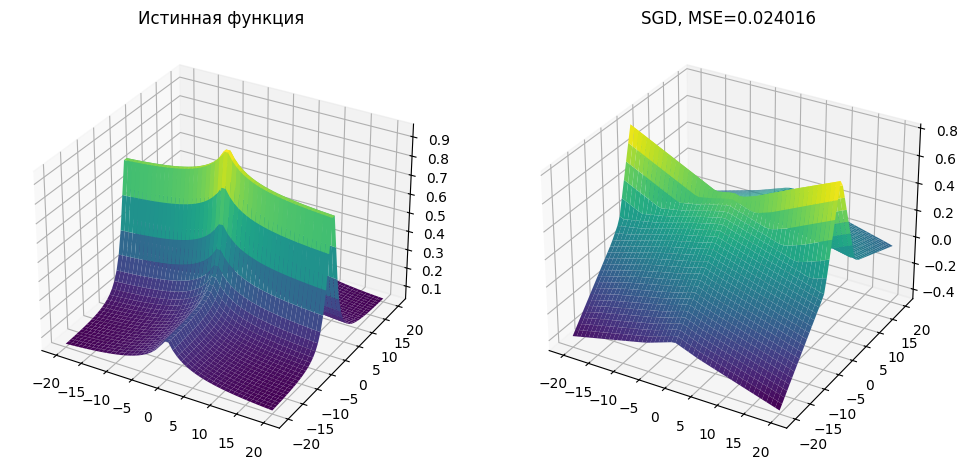


=== Оптимизатор: AdaGrad ===
Эпоха 100, MSE: 0.048899
Эпоха 200, MSE: 0.045870
Эпоха 300, MSE: 0.043753
Эпоха 400, MSE: 0.042007
Эпоха 500, MSE: 0.040498
Эпоха 600, MSE: 0.039167
Эпоха 700, MSE: 0.037966
Эпоха 800, MSE: 0.036867
Эпоха 900, MSE: 0.035845
Эпоха 1000, MSE: 0.034885


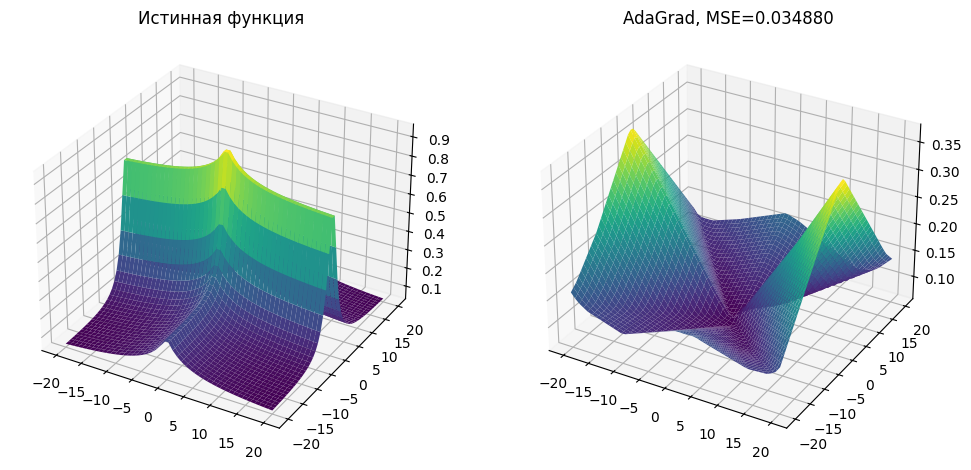


=== Оптимизатор: Adam ===
Эпоха 100, MSE: 0.002998
Эпоха 200, MSE: 0.000754
Эпоха 300, MSE: 0.000517
Эпоха 400, MSE: 0.000490
Эпоха 500, MSE: 0.000168
Эпоха 600, MSE: 0.000352
Эпоха 700, MSE: 0.000308
Эпоха 800, MSE: 0.000347
Эпоха 900, MSE: 0.000262
Эпоха 1000, MSE: 0.000249


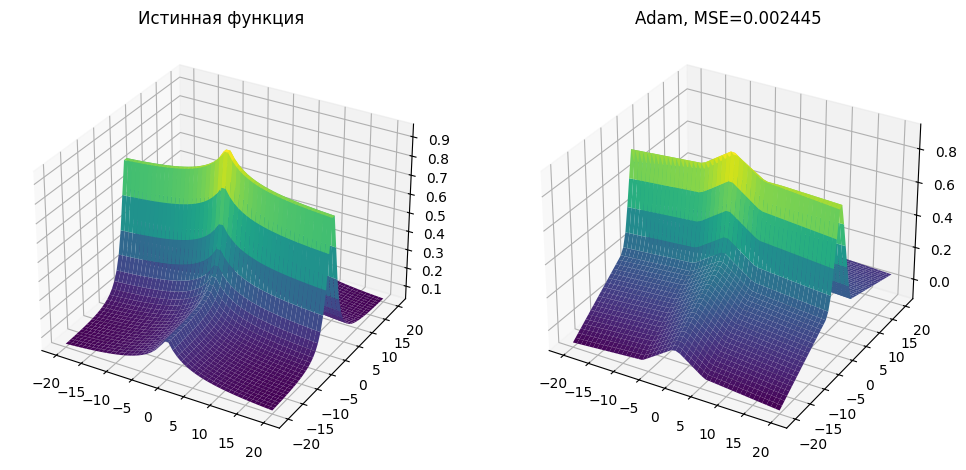

In [ ]:
# Пример вывода с оптимизаторами
def evaluate_optimizers():
    x_range = (-20, 20)
    y_range = (-20, 20)
    num_points = 50

    # Генерация данных
    x = np.linspace(*x_range, num_points)
    y = np.linspace(*y_range, num_points)
    X, Y = np.meshgrid(x, y)
    Z = 1 / (np.abs(X) + 4) + 3 / (Y**2 + 4)  # Целевая функция
    inputs = np.c_[X.ravel(), Y.ravel()]
    outputs = Z.ravel()

    for optimizer in ['Adam']:
        print(f"\n=== Оптимизатор: {optimizer} ===")
        nn = NeuralNetwork(activation='relu', learning_rate=0.0001, epochs=1000, hidden_neurons=20, optimizer=optimizer)
        loss_history = nn.train(inputs, outputs)
        Z_pred = nn.predict(inputs)
        mse = np.mean((Z - Z_pred.reshape(X.shape)) ** 2)
        nn.plot_results(X, Y, Z, Z_pred.reshape(X.shape), f"{optimizer}, MSE={mse:.6f}")


# Вызов
evaluate_optimizers()


=== Оптимизатор: SGD ===
Эпоха 100, MSE: 0.004550
Эпоха 200, MSE: 0.004446
Эпоха 300, MSE: 0.003876
Эпоха 400, MSE: 0.003582
Эпоха 500, MSE: 0.003405
Эпоха 600, MSE: 0.003523
Эпоха 700, MSE: 0.003998
Эпоха 800, MSE: 0.003899
Эпоха 900, MSE: 0.002570
Эпоха 1000, MSE: 0.001150
Эпоха 1100, MSE: 0.001371
Эпоха 1200, MSE: 0.001329
Эпоха 1300, MSE: 0.000894
Эпоха 1400, MSE: 0.000921
Эпоха 1500, MSE: 0.000953
Эпоха 1600, MSE: 0.001642
Эпоха 1700, MSE: 0.000973
Эпоха 1800, MSE: 0.001049
Эпоха 1900, MSE: 0.001097
Эпоха 2000, MSE: 0.001114


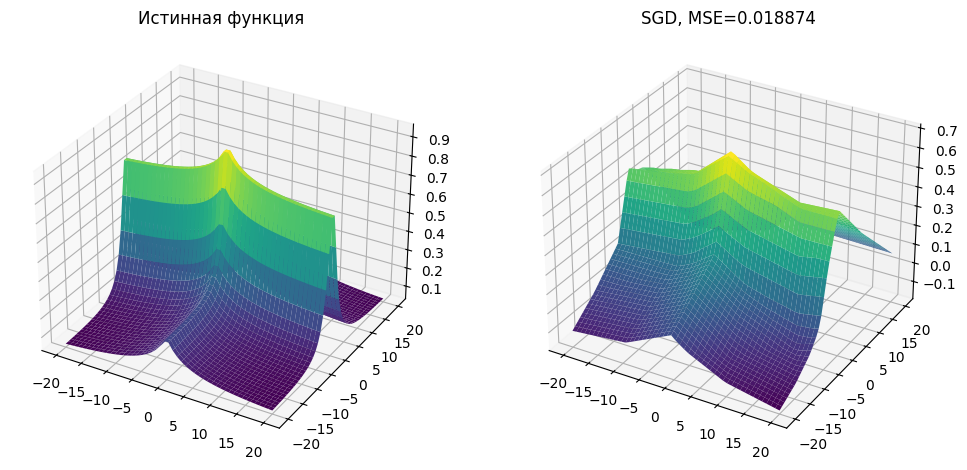


=== Оптимизатор: AdaGrad ===
Эпоха 100, MSE: 0.002089
Эпоха 200, MSE: 0.000953
Эпоха 300, MSE: 0.000499
Эпоха 400, MSE: 0.000297
Эпоха 500, MSE: 0.000200
Эпоха 600, MSE: 0.000135
Эпоха 700, MSE: 0.000096
Эпоха 800, MSE: 0.000075
Эпоха 900, MSE: 0.000060
Эпоха 1000, MSE: 0.000049
Эпоха 1100, MSE: 0.000042
Эпоха 1200, MSE: 0.000036
Эпоха 1300, MSE: 0.000031
Эпоха 1400, MSE: 0.000028
Эпоха 1500, MSE: 0.000026
Эпоха 1600, MSE: 0.000024
Эпоха 1700, MSE: 0.000022
Эпоха 1800, MSE: 0.000021
Эпоха 1900, MSE: 0.000020
Эпоха 2000, MSE: 0.000019


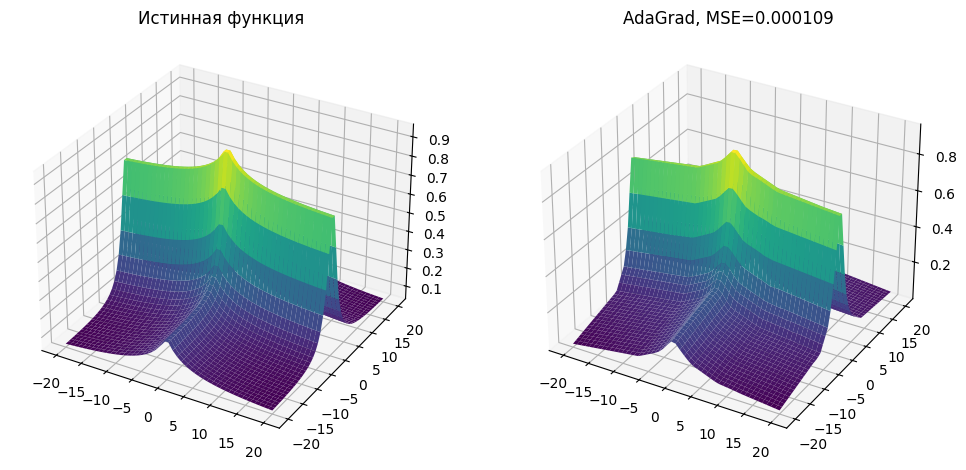

In [ ]:
# Пример вывода с оптимизаторами
def evaluate_optimizers():
    x_range = (-20, 20)
    y_range = (-20, 20)
    num_points = 50

    # Генерация данных
    x = np.linspace(*x_range, num_points)
    y = np.linspace(*y_range, num_points)
    X, Y = np.meshgrid(x, y)
    Z = 1 / (np.abs(X) + 4) + 3 / (Y**2 + 4)  # Целевая функция
    inputs = np.c_[X.ravel(), Y.ravel()]
    outputs = Z.ravel()

    for optimizer in ['SGD', 'AdaGrad']:
        print(f"\n=== Оптимизатор: {optimizer} ===")
        nn = NeuralNetwork(activation='relu', learning_rate=0.01, epochs=2000, hidden_neurons=50, optimizer=optimizer)
        loss_history = nn.train(inputs, outputs)
        Z_pred = nn.predict(inputs)
        mse = np.mean((Z - Z_pred.reshape(X.shape)) ** 2)
        nn.plot_results(X, Y, Z, Z_pred.reshape(X.shape), f"{optimizer}, MSE={mse:.6f}")


# Вызов
evaluate_optimizers()

## Задание 3. Двуслойная нейронка
Для третьего задания : Sigmoid, Гиперболический тангенс, SGD

Эпоха 100, MSE: 0.000068
Эпоха 200, MSE: 0.000018
Эпоха 300, MSE: 0.000013
Эпоха 400, MSE: 0.000012
Эпоха 500, MSE: 0.000011
Эпоха 600, MSE: 0.000009
Эпоха 700, MSE: 0.000007
Эпоха 800, MSE: 0.000006
Эпоха 900, MSE: 0.000005
Эпоха 1000, MSE: 0.000005


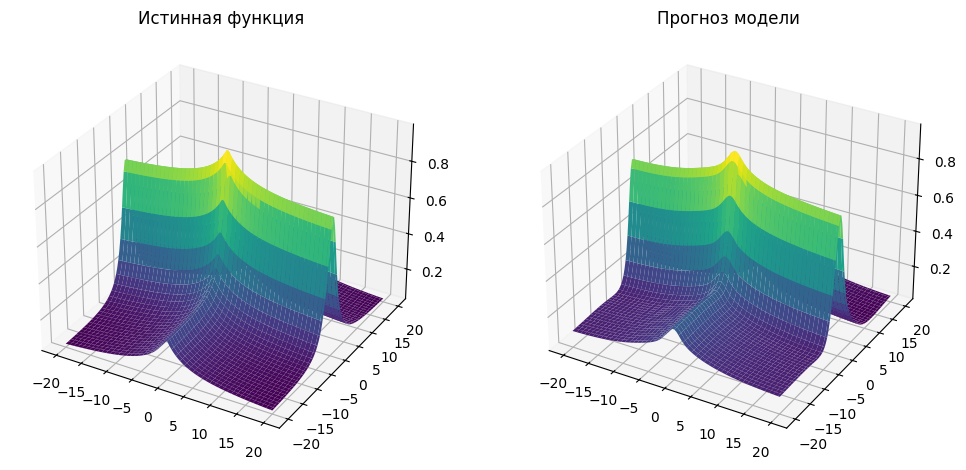

MSE модели: 0.000941


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class NeuralNetworkTwoLayers:
    def __init__(self, activation1='sigmoid', activation2='tanh', learning_rate=0.005, epochs=1000, hidden_neurons1=10, hidden_neurons2=10):
        self.activation1 = activation1
        self.activation2 = activation2
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.hidden_neurons1 = hidden_neurons1
        self.hidden_neurons2 = hidden_neurons2

        # Инициализация весов
        self.weights_input_hidden1 = np.random.uniform(-0.1, 0.1, (2, self.hidden_neurons1))
        self.bias_hidden1 = np.random.uniform(-0.1, 0.1, self.hidden_neurons1)
        self.weights_hidden1_hidden2 = np.random.uniform(-0.1, 0.1, (self.hidden_neurons1, self.hidden_neurons2))
        self.bias_hidden2 = np.random.uniform(-0.1, 0.1, self.hidden_neurons2)
        self.weights_hidden2_output = np.random.uniform(-0.1, 0.1, (self.hidden_neurons2, 1))
        self.bias_output = np.random.uniform(-0.1, 0.1, 1)

    def activate(self, x, activation):
        if activation == 'sigmoid':
            return 1 / (1 + np.exp(-x))
        elif activation == 'tanh':
            return np.tanh(x)

    def activate_derivative(self, x, activation):
        if activation == 'sigmoid':
            sig = 1 / (1 + np.exp(-x))
            return sig * (1 - sig)
        elif activation == 'tanh':
            return 1 - np.tanh(x) ** 2

    def feedforward(self, x):
        # Первый слой
        hidden_input1 = np.dot(x, self.weights_input_hidden1) + self.bias_hidden1
        hidden_output1 = self.activate(hidden_input1, self.activation1)

        # Второй слой
        hidden_input2 = np.dot(hidden_output1, self.weights_hidden1_hidden2) + self.bias_hidden2
        hidden_output2 = self.activate(hidden_input2, self.activation2)

        # Выходной слой
        output_layer_input = np.dot(hidden_output2, self.weights_hidden2_output) + self.bias_output
        return output_layer_input, hidden_output1, hidden_input1, hidden_output2, hidden_input2

    def train(self, X, y):
        loss_history = []
        for epoch in range(1, self.epochs + 1):
            epoch_loss = 0
            for i in range(len(X)):
                input_vector = X[i]
                target = y[i]
                output, hidden_output1, hidden_input1, hidden_output2, hidden_input2 = self.feedforward(input_vector)

                # Вычисление ошибки
                error = target - output
                epoch_loss += np.sum(error ** 2)

                # Обратное распространение
                grad_output = error
                grad_hidden2 = np.dot(grad_output, self.weights_hidden2_output.T) * self.activate_derivative(hidden_input2, self.activation2)
                grad_hidden1 = np.dot(grad_hidden2, self.weights_hidden1_hidden2.T) * self.activate_derivative(hidden_input1, self.activation1)

                # Обновление весов с использованием SGD
                self.weights_hidden2_output += self.learning_rate * np.outer(hidden_output2, grad_output)
                self.bias_output += self.learning_rate * grad_output

                self.weights_hidden1_hidden2 += self.learning_rate * np.outer(hidden_output1, grad_hidden2)
                self.bias_hidden2 += self.learning_rate * grad_hidden2

                self.weights_input_hidden1 += self.learning_rate * np.outer(input_vector, grad_hidden1)
                self.bias_hidden1 += self.learning_rate * grad_hidden1

            loss_history.append(epoch_loss / len(X))
            if epoch % 100 == 0:
                print(f"Эпоха {epoch}, MSE: {epoch_loss / len(X):.6f}")
        return loss_history

    def predict(self, X):
        predictions = []
        for x in X:
            output, *_ = self.feedforward(x)
            predictions.append(output)
        return np.array(predictions)

    def plot_results(self, X, Y, Z, Z_pred):
        fig = plt.figure(figsize=(12, 6))
        ax1 = fig.add_subplot(121, projection='3d')
        ax1.plot_surface(X, Y, Z, cmap='viridis')
        ax1.set_title("Истинная функция")
        ax2 = fig.add_subplot(122, projection='3d')
        ax2.plot_surface(X, Y, Z_pred.reshape(X.shape), cmap='viridis')
        ax2.set_title("Прогноз модели")
        plt.show()


# Генерация данных
x_range = (-20, 20)
y_range = (-20, 20)
num_points = 100
x = np.linspace(*x_range, num_points)
y = np.linspace(*y_range, num_points)
X, Y = np.meshgrid(x, y)
Z = 1 / (np.abs(X) + 4) + 3 / (Y**2 + 4)

# Преобразование данных для обучения
inputs = np.c_[X.ravel(), Y.ravel()]
outputs = Z.ravel()

# Создание и обучение модели
nn = NeuralNetworkTwoLayers(activation1='sigmoid', activation2='tanh', learning_rate=0.01, epochs=1000, hidden_neurons1=20, hidden_neurons2=10)
nn.train(inputs, outputs)

# Предсказание
Z_pred = nn.predict(inputs).reshape(X.shape)

# Вывод результатов
nn.plot_results(X, Y, Z, Z_pred)

# Анализ
mse = np.mean((Z - Z_pred) ** 2)
print(f"MSE модели: {mse:.6f}")
